# Online Shoppers Purchasing Intention

## Dataset
The dataset consists of feature vectors belonging to 12,330 sessions. 
The dataset was formed so that each session 
would belong to a different user in a 1-year period to avoid 
any tendency to a specific campaign, special day, user 
profile, or period.

Download from: [Online Shoppers Purchasing Intention Dataset](https://archive.ics.uci.edu/ml/datasets/Online+Shoppers+Purchasing+Intention+Dataset#)


## Attribute Information
* **Administrative**: Number of pages visited by the visitor about account management
* **Administrative_Duration**: Total amount of time (in seconds) spent by the visitor on account management related pages
* **Informational**: Number of pages visited by the visitor about website, communication and address information of the shopping site
* **Informational_Duration**: Total amount of time (in seconds) spent by the visitor on informational pages
* **ProductRelated**: Number of pages visited by visitor about product related pages
* **ProductRelated_Duration**: Total amount of time (in seconds) spent by the visitor on product related pages
* **BounceRates**: Average bounce rate value of the pages visited by the visitor
* **ExitRates**: Average exit rate value of the pages visited by the visitor
* **PageValues**: Average page value of the pages visited by the visitor
* **SpecialDay**: Closeness of the site visiting time to a special day
* **Month**: Month value of the visit date
* **OperatingSystems**: Operating system of the visitor
* **Browser**: Browser of the visitor
* **Region**: Geographic region from which the session has been started by the visitor
* **TrafficType**: Traffic type by which the visitor has arrived at the website (e.g. banner, SMS, direct)
* **VisitorType**: Visitor type as “New Visitor”, “Returning Visitor” and “Other”
* **Weekend**: Boolean value indicating whether the date of the visit is weekend
* **Revenue**: Class label indicating whether the visit has been finalized with a transaction


## Import package

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.externals.six import StringIO   
from sklearn.tree import export_graphviz
import pydotplus
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing
## Read Data

In [2]:
df = pd.read_csv('online_shoppers_intention.csv')
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


## Drop relatively useless attributes

In [3]:
df = df.drop(['Month'], axis = 1)

## Manage Categorical
We have serveral categorical variables, VisitorType, Weekend, and Revenue, which we need to make into a one-hot encoding.

In [4]:
df.loc[df['VisitorType'] == 'New_Visitor', ['VisitorType']] = 0 
df.loc[df['VisitorType'] == 'Returning_Visitor', ['VisitorType']] = 1
df.loc[df['VisitorType'] == 'Other', ['VisitorType']] = 2 

df.loc[df['Weekend'] == False, ['Weekend']] = 0 
df.loc[df['Weekend'] == True, ['Weekend']] = 1

df.loc[df['Revenue'] == False, ['Revenue']] = 0 
df.loc[df['Revenue'] == True, ['Revenue']] = 1

df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,1,1,1,1,1,0,0
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,2,2,1,2,1,0,0
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,4,1,9,3,1,0,0
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,3,2,2,4,1,0,0
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,3,3,1,4,1,1,0


# Analyze the data
## Top-10 user with product related
* Sort ProductRelated from high to low
* Show their corresponding chance to purchace(Revenue = 1)

In [5]:
sort_by_product = df.sort_values('ProductRelated', ascending=False)
sort_by_product = sort_by_product.drop(['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated_Duration', 
'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType', 'Weekend'], axis = 1).head(10).reset_index()
sort_by_product = sort_by_product.drop(['index'], axis=1)
sort_by_product

,ProductRelated,Revenue
0,705,0
1,686,0
2,584,0
3,534,1
4,518,0
5,517,1
6,501,1
7,486,0
8,470,1
9,449,0


## Plot relation between PageValues which is not 0 and Revenue

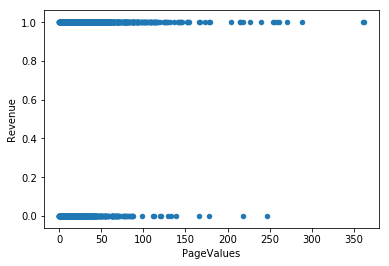

In [22]:
temp = df[df['PageValues'] > 0]
temp.plot.scatter(x='PageValues', y='Revenue')

## Plot HeatMap using seaborn

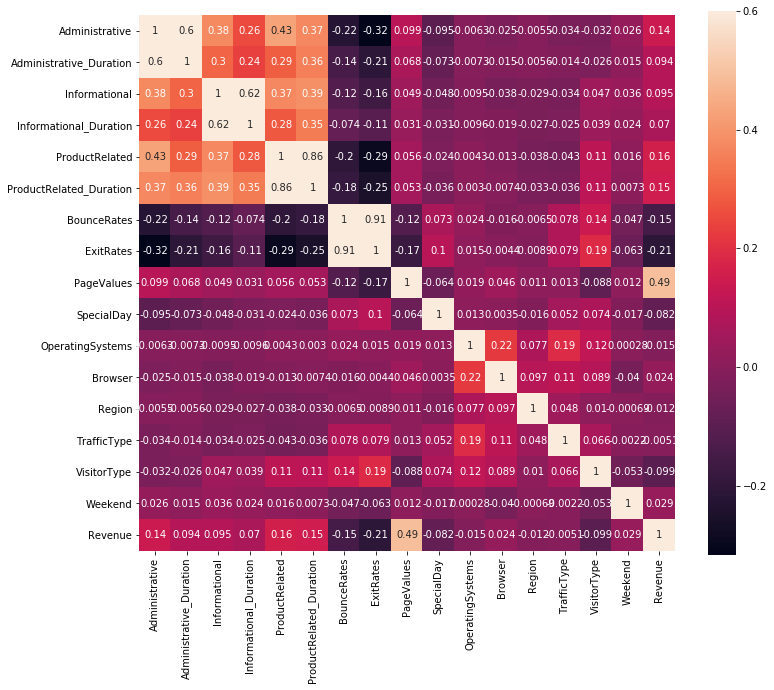

In [6]:
plt.figure(figsize=(12,10))
foo = sns.heatmap(df.corr(), vmax=0.6, square=True, annot=True)

# Predict the purchasing intention of the visitors using Neural Network

From the features above, we want to find a pattern that the user will purchase the product. "Revenue" label indicating whether the visit has been finalized with a transaction.

In order to predict the purchasing intention of the visitors, we use standard neural network for prediction.

## Import libraries

In [7]:
from keras import models, layers, optimizers, regularizers
import numpy as np
import random
from sklearn import model_selection, preprocessing
import tensorflow as tf
from tqdm import tqdm

Using TensorFlow backend.


## Spliting data into training set and test set

In [8]:
def split(df):
    # control randomization for reproducibility
    np.random.seed(42)
    random.seed(42)
    train, test = model_selection.train_test_split(df)
    x_train = train.loc[:, train.columns != 'Revenue']
    y_train = train['Revenue']
    x_test = test.loc[:, test.columns != 'Revenue']
    y_test = test['Revenue']
    return x_train, y_train, x_test, y_test

## Normalize the data

In [9]:
x_train, y_train, x_test, y_test = split(df)
x_train = preprocessing.normalize(x_train)
x_test = preprocessing.normalize(x_test)

## Create a NN baseline model
### Activation functions
![](https://i.imgur.com/IXwgzP1.png)
* ReLU(Rectified Linear Unit):通常效果比 sigmoid 好，也比較容易計算
    * $F(x) = max(0,x)$
    
### Regularization: Prevent overfitting
* 利用 $\rm L_2$ Regularization 量化模型複雜度
    * $\rm L_2\,regularization\,term = \|w\|^2_2 = w_1^2 + w_2^2 + ... + w_n^2$
    * 懲罰權重較重的 features
    
### Hyperparameters

In [10]:
hidden_units = 15    # how many neurons in the hidden layer
activation = 'relu'    # activation function for hidden layer
l2 = 0.001              # regularization - how much we penalize large parameter values
learning_rate = 0.1  # how big our steps are in gradient descent
epochs = 16          # how many epochs to train for
batch_size = 32     # how many samples to use for each gradient descent update

### Build the model

In [11]:
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=16,
                       units=hidden_units, 
                       activation=activation))

# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.


## Balancing the imblance dataset
We have 10422 cases of "FALSE" and 1909 cases of "TRUE" in column "Revenue" which is highly imblanced. Therefore, we need to change the weight of labels so the network won't cheat its way to 89% accuracy.

In [12]:
class_weight = {
     0: 1909 / 12331,
     1: 10422 / 12331
}

### Train the model and see the result

Instructions for updating:
Use tf.cast instead.
Epoch 1/16
9247/9247 [==============================] - 1s 62us/step - loss: 0.1436 - acc: 0.7062
Epoch 2/16
9247/9247 [==============================] - 0s 38us/step - loss: 0.1252 - acc: 0.8005
Epoch 3/16
9247/9247 [==============================] - 1s 57us/step - loss: 0.1277 - acc: 0.7809
Epoch 4/16
9247/9247 [==============================] - 0s 46us/step - loss: 0.1230 - acc: 0.8005
Epoch 5/16
9247/9247 [==============================] - 0s 31us/step - loss: 0.1220 - acc: 0.8072
Epoch 6/16
9247/9247 [==============================] - 0s 33us/step - loss: 0.1245 - acc: 0.7970
Epoch 7/16
9247/9247 [==============================] - 0s 32us/step - loss: 0.1209 - acc: 0.8103
Epoch 8/16
9247/9247 [==============================] - 0s 34us/step - loss: 0.1192 - acc: 0.8205
Epoch 9/16
9247/9247 [==============================] - 0s 34us/step - loss: 0.1195 - acc: 0.8152
Epoch 10/16
9247/9247 [==============================] - 0s 35us/step 

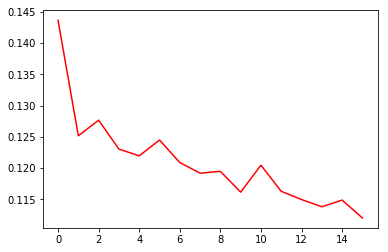

In [13]:
# train the parameters
history = model.fit(x_train, y_train, epochs=16, batch_size=batch_size, class_weight=class_weight)

# evaluate accuracy
train_acc = model.evaluate(x_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

## Non-Determinancy
The initial parameters of the network will be randomly determined. We will start on a random part of the loss surface each time. This will lead to a different result.
This is actually a research probelm at the moment. So what can we do if we want a fair competition? We will train our network 20 times and take the average.

In [14]:
def train_and_evaluate(model, x_train, y_train, x_test, y_test, n=20):
    train_accs = []
    test_accs = []
    with tqdm(total=n) as progress_bar:
        for _ in range(n):
            model.fit(
                x_train, 
                y_train, 
                epochs=epochs, 
                batch_size=batch_size, 
                class_weight=class_weight, 
                verbose=False)
            train_accs.append(model.evaluate(x_train, y_train, batch_size=32, verbose=False)[1])
            test_accs.append(model.evaluate(x_test, y_test, batch_size=32, verbose=False)[1])
            progress_bar.update()
    print('Avgerage Training Accuracy: %s' % np.average(train_accs))
    print('Avgerage Testing Accuracy: %s' % np.average(test_accs))
    return train_accs, test_accs

In [15]:
_, __ = train_and_evaluate(model, x_train, y_train, x_test, y_test)

100%|██████████| 20/20 [01:33<00:00,  4.88s/it]

Avgerage Training Accuracy: 0.8469611765369024
Avgerage Testing Accuracy: 0.8480862795813613


## Improvement(Beat baseline model)
### Tuning hyperparameter
* hidden_units: $15 \rightarrow 20$
* epochs: $16 \rightarrow 30$

In [16]:
hidden_units = 20      # how many neurons in the hidden layer
activation = 'relu'      # activation function for hidden layer
l2 = 0.001                # regularization - how much we penalize large parameter values
learning_rate = 0.01  # how big our steps are in gradient descent
epochs = 30            # how many epochs to train for
batch_size = 32       # how many samples to use for each gradient descent update

In [17]:
# create a sequential model
model = models.Sequential()

# add the hidden layer
model.add(layers.Dense(input_dim=16,
                       units=hidden_units, 
                       activation=activation))

# add the output layer
model.add(layers.Dense(input_dim=hidden_units,
                       units=1,
                       activation='sigmoid'))

# define our loss function and optimizer
model.compile(loss='binary_crossentropy',
              # Adam is a kind of gradient descent
              optimizer=optimizers.Adam(lr=learning_rate),
              metrics=['accuracy'])

Epoch 1/16
9247/9247 [==============================] - 1s 82us/step - loss: 0.1599 - acc: 0.6443
Epoch 2/16
9247/9247 [==============================] - 0s 48us/step - loss: 0.1345 - acc: 0.7673
Epoch 3/16
9247/9247 [==============================] - 0s 53us/step - loss: 0.1256 - acc: 0.8002
Epoch 4/16
9247/9247 [==============================] - 0s 47us/step - loss: 0.1206 - acc: 0.8056
Epoch 5/16
9247/9247 [==============================] - 0s 36us/step - loss: 0.1169 - acc: 0.8287
Epoch 6/16
9247/9247 [==============================] - 0s 35us/step - loss: 0.1164 - acc: 0.8250
Epoch 7/16
9247/9247 [==============================] - 0s 47us/step - loss: 0.1133 - acc: 0.8370
Epoch 8/16
9247/9247 [==============================] - 0s 38us/step - loss: 0.1131 - acc: 0.8318
Epoch 9/16
9247/9247 [==============================] - 0s 51us/step - loss: 0.1120 - acc: 0.8405
Epoch 10/16
9247/9247 [==============================] - 0s 53us/step - loss: 0.1109 - acc: 0.8372
Epoch 11/16
9247/92

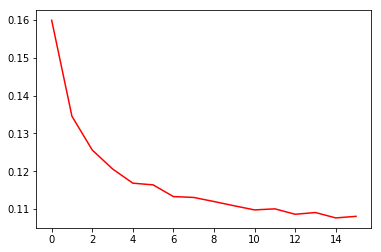

In [18]:
# train the parameters
history = model.fit(x_train, y_train, epochs=16, batch_size=batch_size, class_weight=class_weight)

# evaluate accuracy
train_acc = model.evaluate(x_train, y_train, batch_size=32)[1]
test_acc = model.evaluate(x_test, y_test, batch_size=32)[1]
print('Training accuracy: %s' % train_acc)
print('Testing accuracy: %s' % test_acc)

losses = history.history['loss']
plt.plot(range(len(losses)), losses, 'r')
plt.show()

In [19]:
_, __ = train_and_evaluate(model, x_train, y_train, x_test, y_test)

100%|██████████| 20/20 [03:19<00:00, 10.19s/it]

Avgerage Training Accuracy: 0.8589055909631677
Avgerage Testing Accuracy: 0.8537139150507065
